# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [58]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
#import matplotlib.pyplot as pd
import seaborn as sns
import string

In [59]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [60]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
1,Not Verified | I flew from Malaga via LHR to...
2,✅ Trip Verified | Milan to Miami return via L...
3,✅ Trip Verified | BA created a new low-cost s...
4,✅ Trip Verified | I flew with British Airway...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [61]:
df.to_csv("BA_reviews.csv")

# READ DATASET

In [65]:
df

,reviews
0,"✅ Trip Verified | LHR - SFO, LAS - LGW August..."
1,Not Verified | I flew from Malaga via LHR to...
2,✅ Trip Verified | Milan to Miami return via L...
3,✅ Trip Verified | BA created a new low-cost s...
4,✅ Trip Verified | I flew with British Airway...
...,...
995,"✅ Trip Verified | London City to Zurich, I fl..."
996,✅ Trip Verified | I booked a flight from Buch...
997,✅ Trip Verified | London to Calgary. Thank yo...
998,"✅ Trip Verified | Vancouver to London, we wer..."


In [95]:
df.reviews= df.reviews.str.split('|',expand=True)
df.reviews

0        LHR - SFO, LAS - LGW August 2023 in Club Wor...
1         I flew from Malaga via LHR to Boston on the...
2        Milan to Miami return via London. Worst busi...
3        BA created a new low-cost subsidiary in BA E...
4         I flew with British Airways from Heathrow t...
                             ...                        
995      London City to Zurich, I fly this route a lo...
996      I booked a flight from Bucharest to London a...
997      London to Calgary. Thank you to James, a Clu...
998      Vancouver to London, we were upgraded to bus...
999      \r\nMiami to London Heathrow with British Ai...
Name: reviews, Length: 1000, dtype: object

In [74]:
df.shape

(1000, 1)

In [75]:
df.size

1000

# Rule-based approach

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER, SentiWordNet.

# Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# TEXT CLEANING
We will clean the data to remove the "✅ Trip Verified" text, then convert the text into lower-case, and remove all the punctuation marks from the data. This is essential as punctuation marks do not add any meaningful value for the analysis.

In [76]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()


,reviews,Cleaned Reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...


In [98]:
import string

def case_and_punctuation_handling(text):
    lower_case_text = text.lower()
    cleaned_text = lower_case_text.translate(str.maketrans("", "", string.punctuation))
    return cleaned_text

df["cleaned_reviews"] = df["reviews"].apply(case_and_punctuation_handling)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis,cleaned_reviews
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...,0.9545,Positive,lhr sfo las lgw august 2023 in club world ...
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...,-0.7184,Negative,i flew from malaga via lhr to boston on the...
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...,-0.9148,Negative,milan to miami return via london worst busin...
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...,0.9898,Positive,ba created a new lowcost subsidiary in ba eu...
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...,-0.8176,Negative,i flew with british airways from heathrow t...


# Identify frequent words that customer allways discussd about in the airline station

In [77]:
freq_words = pd.Series(" ".join(reviews).lower().split()).value_counts()[:50]
freq_words

the         7317
to          5349
and         4479
a           3312
was         3276
i           3080
of          2055
in          2026
on          1772
for         1707
flight      1497
not         1406
with        1357
my          1346
we          1302
that        1191
they        1158
is          1117
were        1070
at          1059
ba          1045
it          1036
verified    1003
|            999
had          964
but          923
have         863
trip         850
this         834
no           809
as           791
✅            760
from         743
our          612
an           576
very         575
me           574
so           551
service      547
be           522
you          494
are          489
there        431
british      423
when         419
which        412
one          403
crew         397
their        394
food         388
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


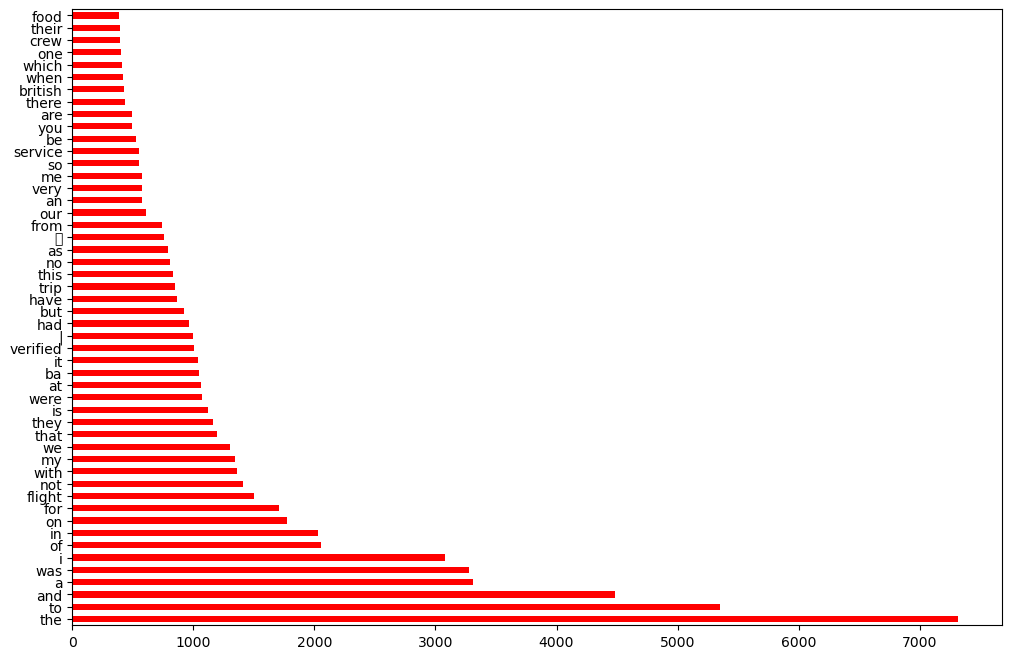

In [78]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
freq_words.plot.barh(x=freq_words[0],y=freq_words[1], color="red")
plt.show()

# Step 2: Tokenization, Stopwords removal, and POS-tagging
Tokenization breaks text(or sentences, in our case) into smaller parts(or individual words) for easier machine analysis, helping machines understand human language. Tokenization, in the realm of Natural Language Processing (NLP) and machine learning, refers to the process of converting a sequence of text into smaller parts, known as tokens. So here, we will tokenize our text data to convert it into smaller tokens(or words).

Stopwords are a set of commonly used words in a language. Examples of stop words in English are "a", "the", "is", "are", etc. Stopwords are commonly used in Natural Language Processing (NLP) to eliminate words that are so widely used that carry very little useful information. We will remove such stopwords from our data going forward.

Part-of-speech (POS) tagging is fundamental in natural language processing (NLP) and it involves labelling words in a sentence with their corresponding POS tags having form (word, tag). POS tags indicate the grammatical category of a word, such as noun, verb, adjective, adverb, etc. The goal of POS tagging is to determine a sentence’s syntactic structure and identify each word’s role in the sentence. POS tagging is essential to preserve the context of the word and is essential for Lemmatization.

# Step 2: Tokenization
Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Tokenization breaks text(or sentences, in our case) into smaller parts(or individual words) for easier machine analysis, helping machines understand human language. Tokenization, in the realm of Natural Language Processing (NLP) and machine learning, refers to the process of converting a sequence of text into smaller parts, known as tokens. So here, we will tokenize our text data to convert it into smaller tokens(or words).

# Step 3: Enrichment – POS tagging
Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.


Part-of-speech (POS) tagging is fundamental in natural language processing (NLP) and it involves labelling words in a sentence with their corresponding POS tags having form (word, tag). POS tags indicate the grammatical category of a word, such as noun, verb, adjective, adverb, etc. The goal of POS tagging is to determine a sentence’s syntactic structure and identify each word’s role in the sentence. POS tagging is essential to preserve the context of the word and is essential for Lemmatization.

# Step 4: Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.


Stopwords are a set of commonly used words in a language. Examples of stop words in English are "a", "the", "is", "are", etc. Stopwords are commonly used in Natural Language Processing (NLP) to eliminate words that are so widely used that carry very little useful information. We will remove such stopwords from our data going forward.

# Step 5: Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


# NATURAL LANGUAGE PROCESSING TOOLKIT
NLTK is a leading platform for building Python programs to work with human language data. 

It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP librarie

In [79]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/abidemiavoseh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abidemiavoseh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abidemiavoseh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [81]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()
#[nltk_data] Downloading package omw-1.4 to /root/nltk_data...

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/abidemiavoseh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/abidemiavoseh/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu..."
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)..."
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No..."
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c..."
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath..."


# Lemmatization 
Lammatizationis the process of grouping together the different inflected forms of a word so they can be analyzed as a single item, generally known as stem. A stem is responsible for the word's lexical meaning. The two popular techniques of obtaining the stem words are Stemming and Lemmatization.

We will use the Lemmatization process here as Stemming often gives some meaningless root words as it simply chops off some characters in the end, whereas, Lemmatization gives meaningful root words. It is important to note that, lemmatization requires POS tagging of the words, which we have already accomplished in the previous step.

In [82]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...


In [83]:
df[['reviews','Lemma']]

,reviews,Lemma
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August Club World shame Brit...
1,I flew from Malaga via LHR to Boston on the...,fly Malaga via LHR Boston th May arrival Bos...
2,Milan to Miami return via London. Worst busi...,Milan Miami return via London Worst business...
3,BA created a new low-cost subsidiary in BA E...,BA create new low cost subsidiary BA Eurofly...
4,I flew with British Airways from Heathrow t...,fly British Airways Heathrow Hannover Althou...
...,...,...
995,"London City to Zurich, I fly this route a lo...",London City Zurich fly route lot around time...
996,I booked a flight from Bucharest to London a...,book flight Bucharest London return airport ...
997,"London to Calgary. Thank you to James, a Clu...",London Calgary Thank James Club World flight...
998,"Vancouver to London, we were upgraded to bus...",Vancouver London upgrade business class airp...


# Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analyzer that has been trained on social media text. Here, SentimentIntensityAnalyzer() is an object and polarity_scores is a method which will give us scores of the following categories:

Positive
Negative
Neutral
Compound
The compound score is the sum of positive, negative & neutral scores which is then normalized between -1(most extreme negative) and +1 (most extreme positive). The more Compound score closer to +1, the higher the positivity of the text. For our Analyser, we will consider compound score of >=0.5 as positive, and compund score of <0 as negative.

In [86]:
%pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 211.8 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [87]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...,0.9545,Positive
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...,-0.7184,Negative
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...,-0.9148,Negative
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...,0.9898,Positive
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...,-0.8176,Negative


In [88]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    476
Negative    416
Neutral     108
Name: Analysis, dtype: int64

In [92]:
df.to_csv("BA_reviews.csv")
df

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,"LHR - SFO, LAS - LGW August 2023 in Club Wor...",LHR SFO LAS LGW August in Club World It s a s...,"[(LHR, n), (SFO, n), (LAS, n), (LGW, n), (Augu...",LHR SFO LAS LGW August Club World shame Brit...,0.9545,Positive
1,I flew from Malaga via LHR to Boston on the...,I flew from Malaga via LHR to Boston on the t...,"[(flew, v), (Malaga, n), (via, None), (LHR, n)...",fly Malaga via LHR Boston th May arrival Bos...,-0.7184,Negative
2,Milan to Miami return via London. Worst busi...,Milan to Miami return via London Worst busine...,"[(Milan, n), (Miami, n), (return, n), (via, No...",Milan Miami return via London Worst business...,-0.9148,Negative
3,BA created a new low-cost subsidiary in BA E...,BA created a new low cost subsidiary in BA Eu...,"[(BA, n), (created, v), (new, a), (low, a), (c...",BA create new low cost subsidiary BA Eurofly...,0.9898,Positive
4,I flew with British Airways from Heathrow t...,I flew with British Airways from Heathrow to ...,"[(flew, v), (British, a), (Airways, n), (Heath...",fly British Airways Heathrow Hannover Althou...,-0.8176,Negative
...,...,...,...,...,...,...
995,"London City to Zurich, I fly this route a lo...",London City to Zurich I fly this route a lot ...,"[(London, n), (City, n), (Zurich, n), (fly, v)...",London City Zurich fly route lot around time...,0.8519,Positive
996,I booked a flight from Bucharest to London a...,I booked a flight from Bucharest to London an...,"[(booked, v), (flight, n), (Bucharest, n), (Lo...",book flight Bucharest London return airport ...,-0.8109,Negative
997,"London to Calgary. Thank you to James, a Clu...",London to Calgary Thank you to James a Club W...,"[(London, n), (Calgary, n), (Thank, n), (James...",London Calgary Thank James Club World flight...,0.8687,Positive
998,"Vancouver to London, we were upgraded to bus...",Vancouver to London we were upgraded to busin...,"[(Vancouver, r), (London, n), (upgraded, v), (...",Vancouver London upgrade business class airp...,0.9239,Positive


# Data Vizualization: Pie-Chart

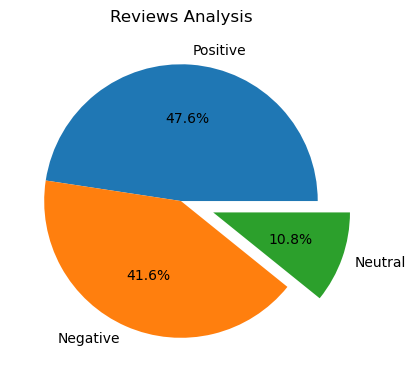

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()

# Data Vizualization: Word Cloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

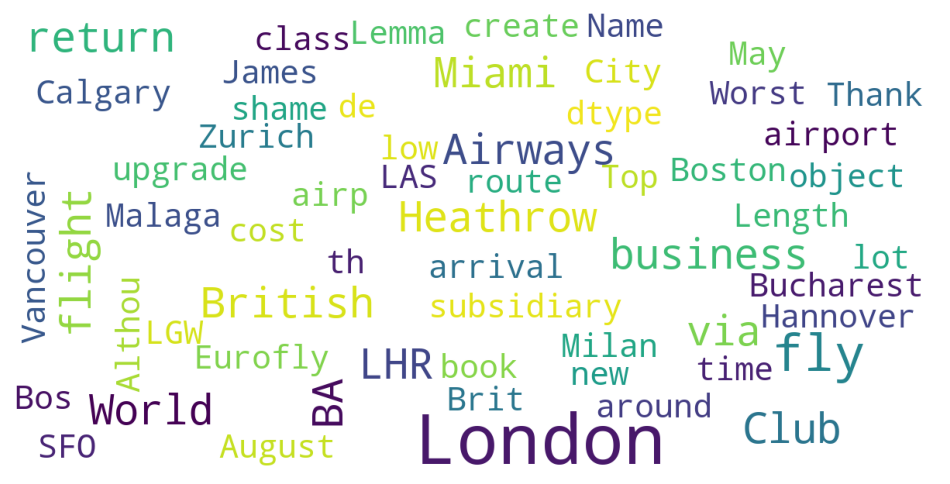

In [93]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)